In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime


from random import gauss
from random import seed
import random
import numpy as np
from pandas import Series
from pandas import read_csv
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm


from statsmodels.graphics.tsaplots import plot_acf

In [76]:
!pip install --upgrade pandas statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 42.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [78]:
# Get Historical Intuit Data since 2015

intuit_data = yf.download("INTU", start="2015-01-01")

# Add daily returnsolumn
intuit_data['Daily_Return'] = intuit_data['Close'].pct_change()

intuit_close = intuit_data["Close"]

[*********************100%***********************]  1 of 1 completed


In [89]:
# Display the first few rows of data
print(intuit_data.head())

print()

# Display the first few rows of data
print(intuit_close.head())


Price           Close       High        Low       Open   Volume Daily_Return
Ticker           INTU       INTU       INTU       INTU     INTU             
Date                                                                        
2015-01-02  83.803795  85.595460  83.032006  84.722595  1880300          NaN
2015-01-05  83.473007  83.923217  82.453138  82.967671  2493300    -0.003947
2015-01-06  80.909569  83.794602  80.496111  83.436270  2283800    -0.030710
2015-01-07  81.702003  82.042930  80.964874  81.057015  1657600     0.009794
2015-01-08  82.798439  83.507926  82.116593  82.171876  1947100     0.013420

Ticker           INTU
Date                 
2015-01-02  83.803795
2015-01-05  83.473007
2015-01-06  80.909569
2015-01-07  81.702003
2015-01-08  82.798439


In [68]:
#Summary Stats for the Daily Close Price
print(intuit_close.describe())

Ticker         INTU
count   2578.000000
mean     313.375674
std      187.351756
min       73.961517
25%      130.770493
50%      268.123734
75%      459.282280
max      705.076782


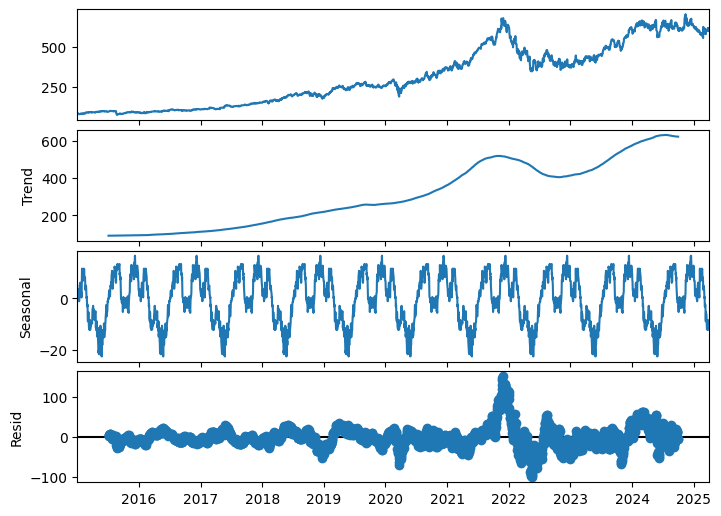

In [88]:
# Decomposition
decomposition = sm.tsa.seasonal_decompose(intuit_close, model='additive', period=252) # or 'multiplicative'

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(7, 5)  # Adjust these numbers as needed (width, height)
plt.show()

This indicated non-stationary and it looks like there is seasonality

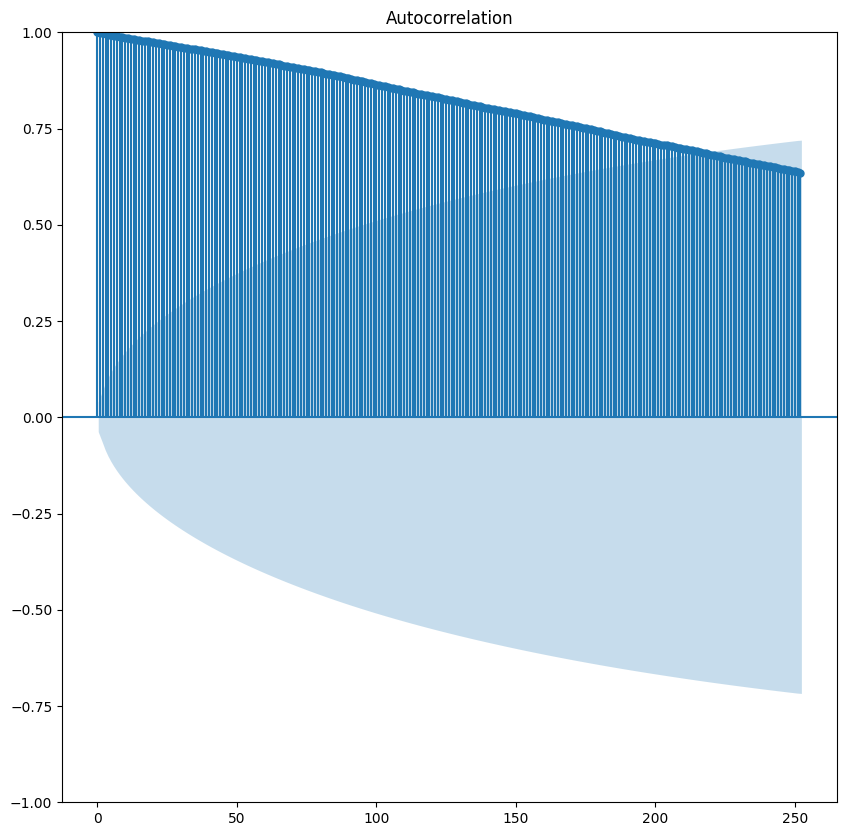

In [84]:
# Autocorrelation
plot_acf(intuit_close, lags=252)
plt.show()

Highly correclated at lag 1 and then decays over time


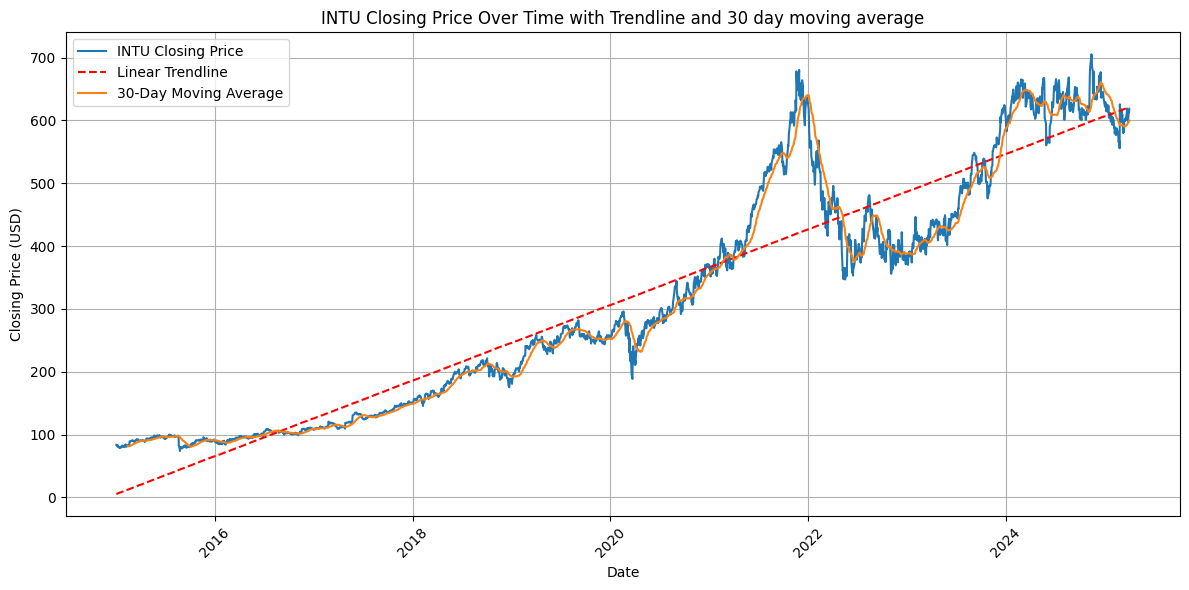

In [70]:
# Line Chart
plt.figure(figsize=(12, 6))
plt.plot(intuit_data.index, intuit_data['Close'], label='INTU Closing Price')

# Linear Trend
x = np.arange(len(intuit_data.index))
z = np.polyfit(x, intuit_data['Close'], 1)
p = np.poly1d(z.flatten())
plt.plot(intuit_data.index, p(x), "r--", label='Linear Trendline')

# Calculate 30-day moving average
intuit_data['30_day_avg'] = intuit_data['Close'].rolling(window=30).mean()
plt.plot(intuit_data.index, intuit_data['30_day_avg'], label='30-Day Moving Average')


plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('INTU Closing Price Over Time with Trendline and 30 day moving average')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [90]:
#Linear Regression model to predict next 30 days

days = np.arange(len(intuit_close)).reshape(-1, 1)  # Reshape for sklearn
prices = intuit_close.values.reshape(-1, 1)

In [91]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(days, prices)


LinearRegression()

In [92]:
# Predict the next 30 days
last_day = days[-1][0]
future_days = np.arange(last_day + 1, last_day + 31).reshape(-1, 1)
future_prices = model.predict(future_days)

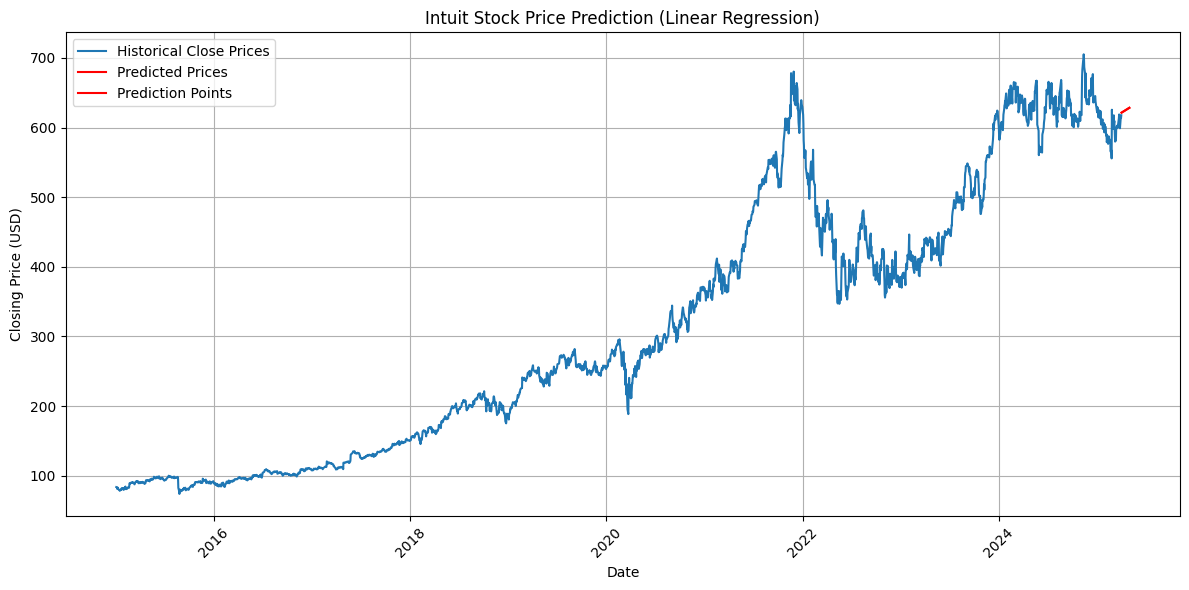

In [97]:
# Plot the historical data and predictions
plt.figure(figsize=(12, 6))
plt.plot(intuit_close.index, intuit_close, label="Historical Close Prices")


future_dates = pd.date_range(start=intuit_close.index[-1] + pd.Timedelta(days=1), periods=30)
plt.plot(future_dates, future_prices, "r-", label="Predicted Prices")
plt.plot(future_dates, future_prices, color='red', label = "Prediction Points")


plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Intuit Stock Price Prediction (Linear Regression)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [100]:
# Show the Next 30 Days prediction based on Linear Model
future_predictions_df = pd.DataFrame(future_prices, index=future_dates, columns=['Predicted Close'])
print(future_predictions_df)

            Predicted Close
2025-04-03       621.344435
2025-04-04       621.583263
2025-04-05       621.822091
2025-04-06       622.060919
2025-04-07       622.299747
2025-04-08       622.538575
2025-04-09       622.777403
2025-04-10       623.016232
2025-04-11       623.255060
2025-04-12       623.493888
2025-04-13       623.732716
2025-04-14       623.971544
2025-04-15       624.210372
2025-04-16       624.449200
2025-04-17       624.688028
2025-04-18       624.926856
2025-04-19       625.165684
2025-04-20       625.404512
2025-04-21       625.643340
2025-04-22       625.882169
2025-04-23       626.120997
2025-04-24       626.359825
2025-04-25       626.598653
2025-04-26       626.837481
2025-04-27       627.076309
2025-04-28       627.315137
2025-04-29       627.553965
2025-04-30       627.792793
2025-05-01       628.031621
2025-05-02       628.270449
